In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
log_dir='data_plot'



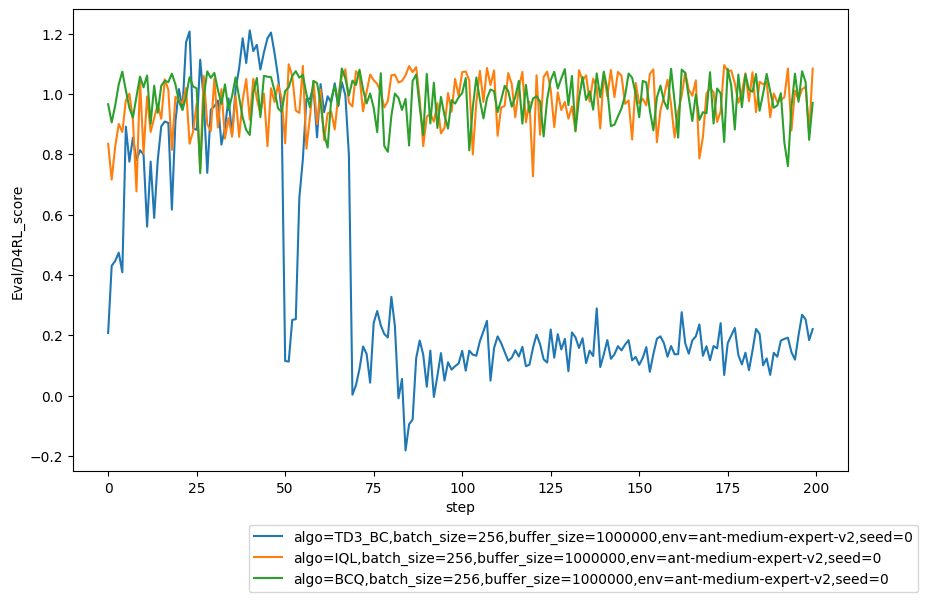

In [4]:

target_list_bak=["Eval/AverageReturn","Eval/StdReturn"
,"Eval/MedianReturn","Eval/MinReturn","Eval/D4RL_score","training time"]

target_list=["Eval/D4RL_score"]

for target in target_list:
    plt.figure(figsize=(10,6))
    for data_path in os.listdir(log_dir):
        file_path=log_dir+'/'+data_path+'/'+"progress.csv"
        with open(file_path) as file:
            data=pd.read_csv(file_path,sep=',',header=0)
            plt.plot(data[target].values,label=data_path)

    plt.xlabel('step')
    plt.ylabel(target)
    plt.legend(bbox_to_anchor=(1.1, -.1),ncol=1)    
    plt.show()

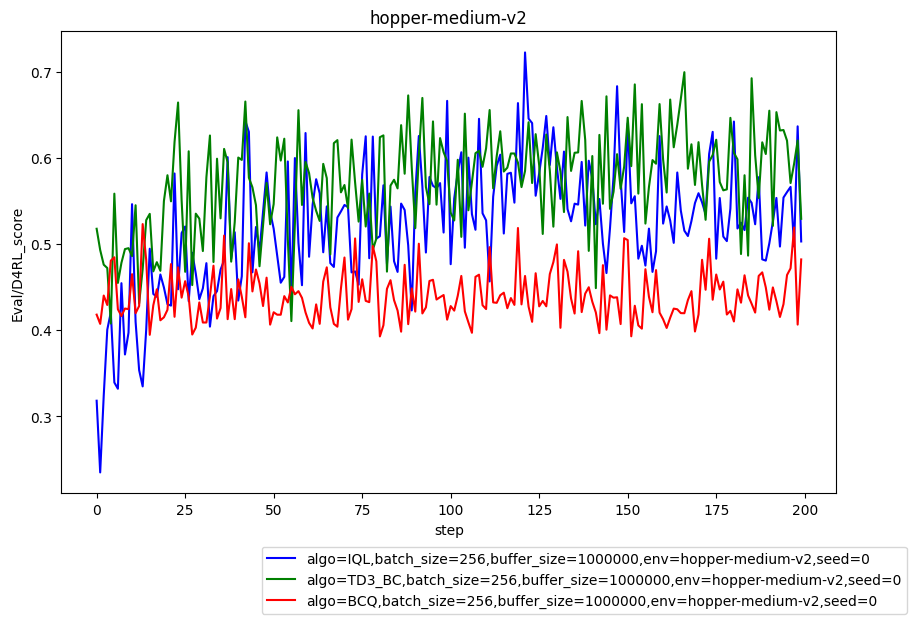

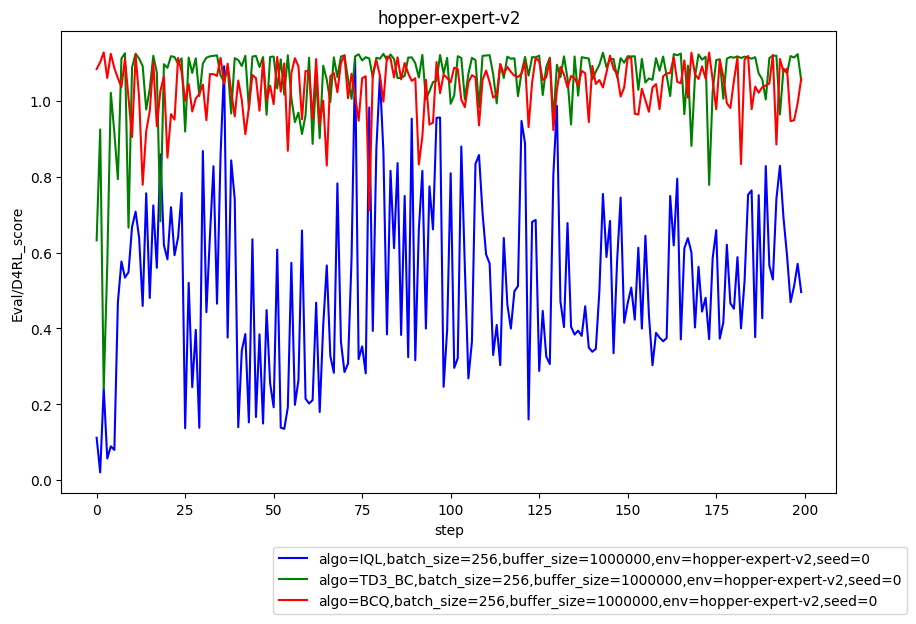

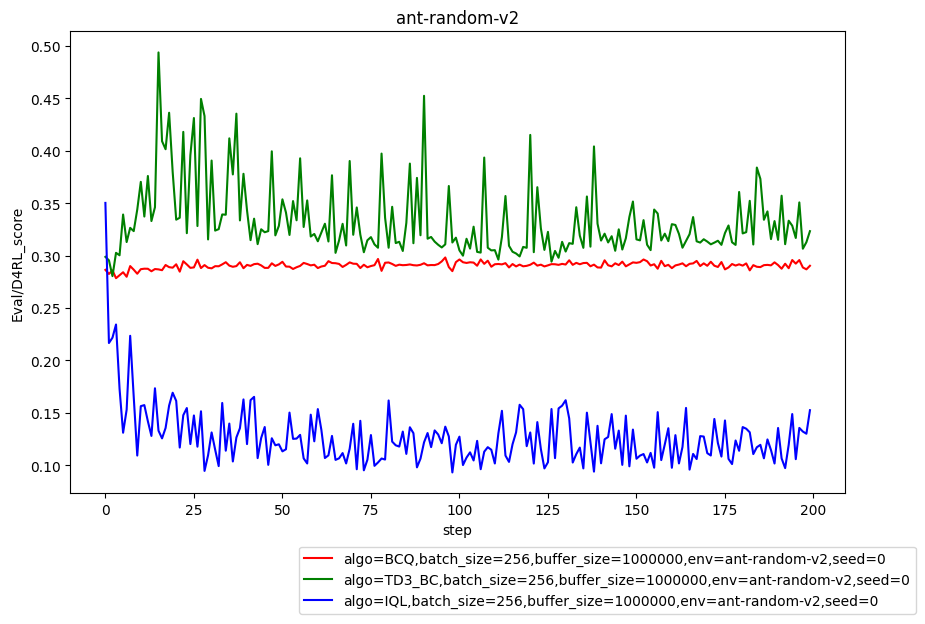

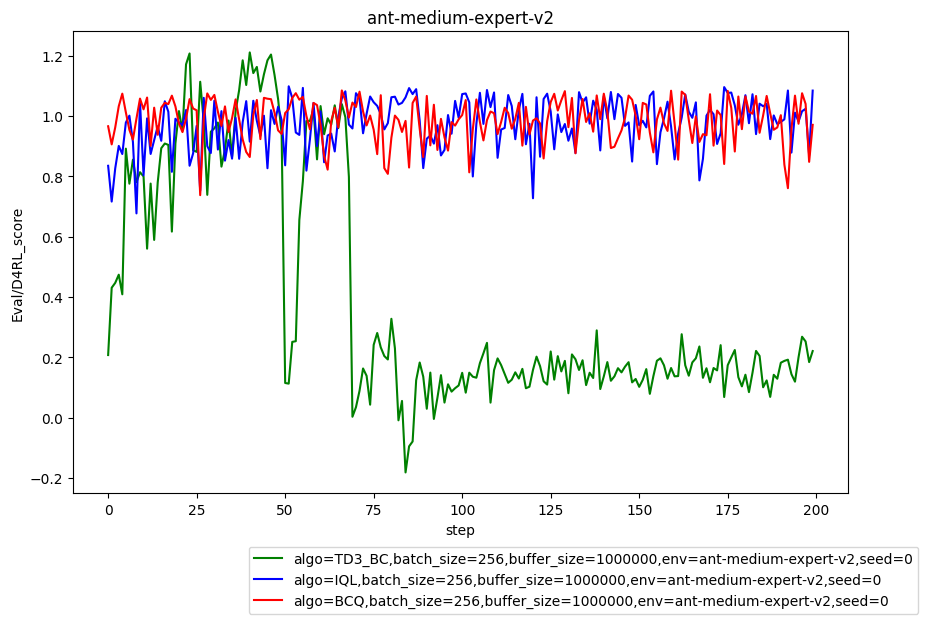

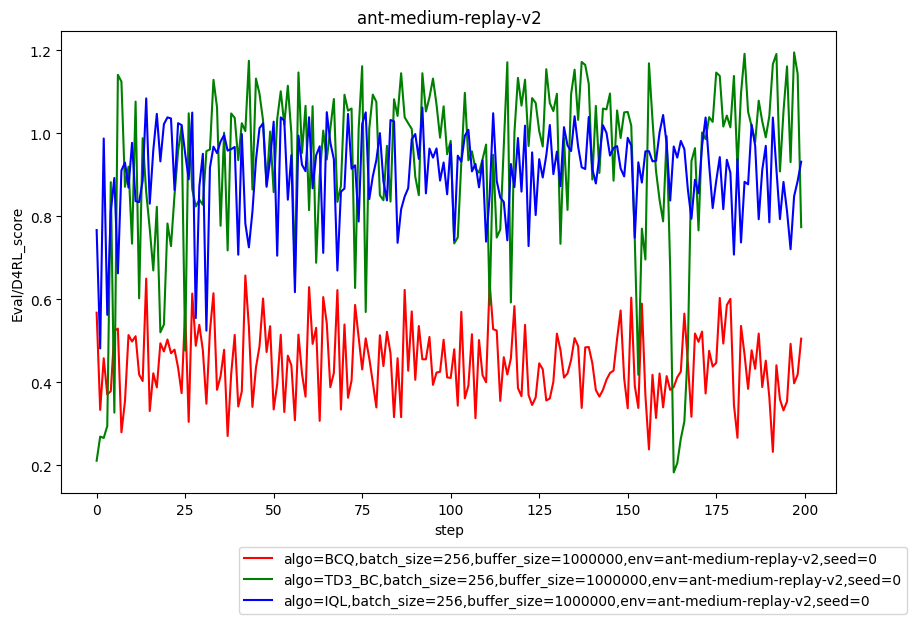

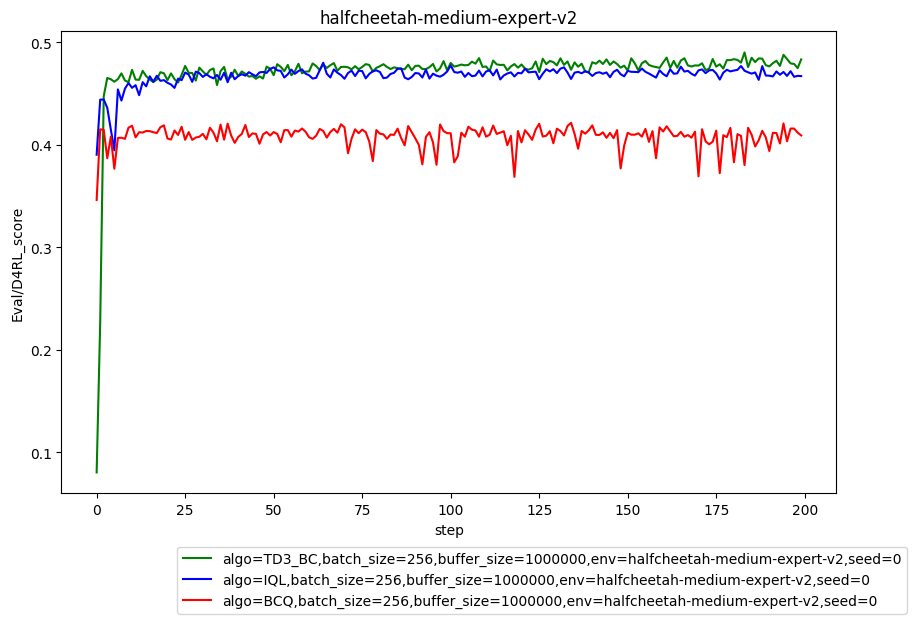

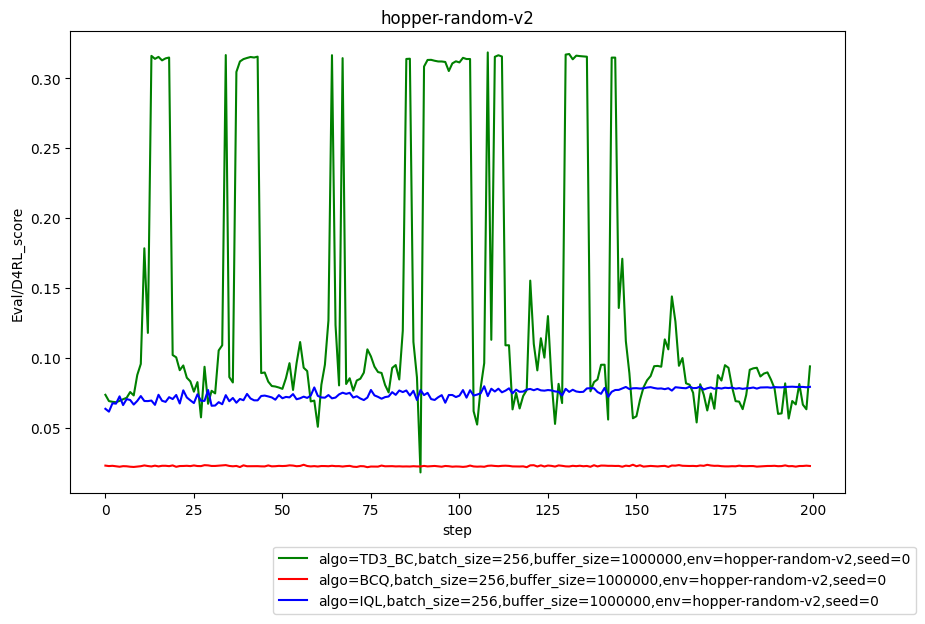

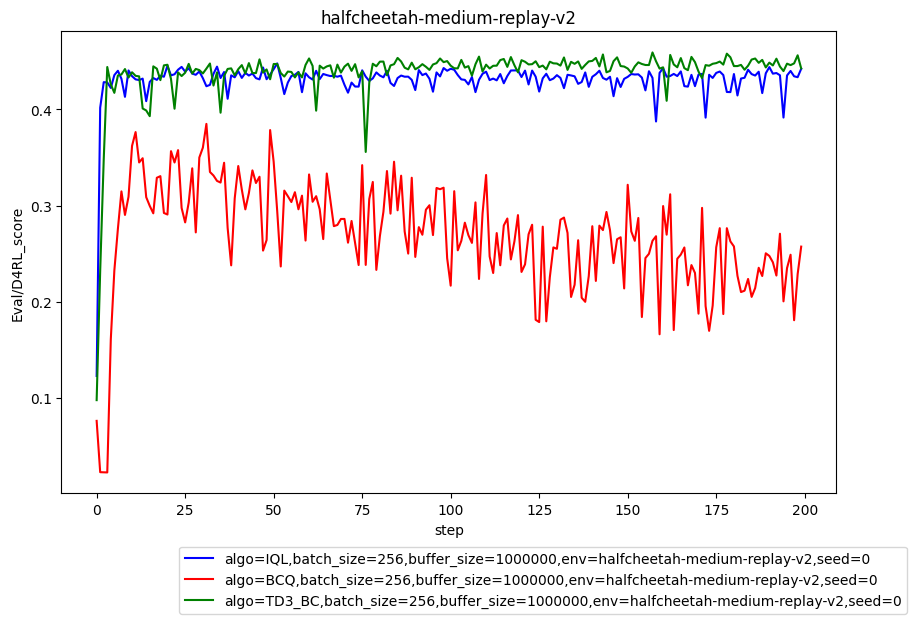

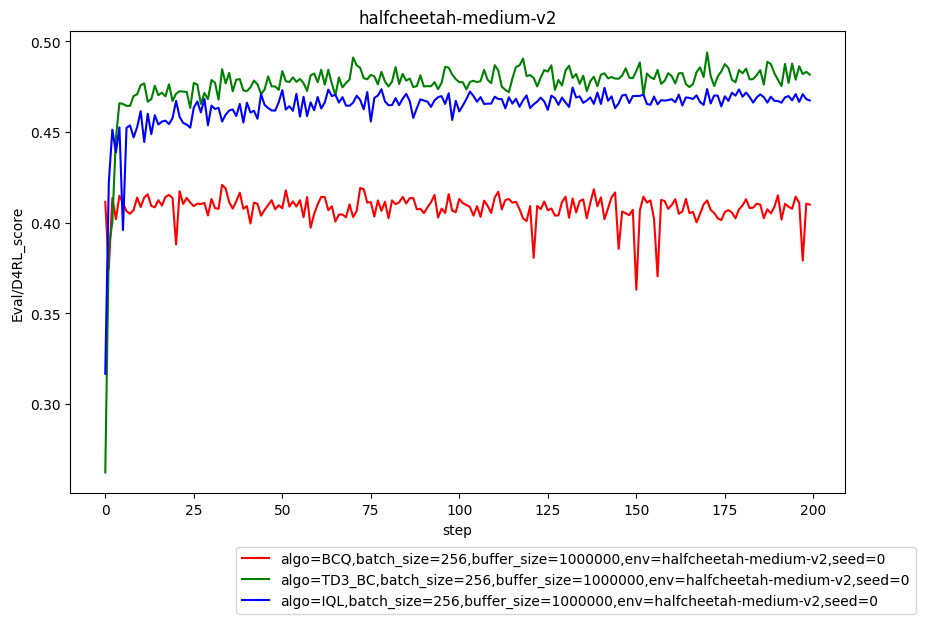

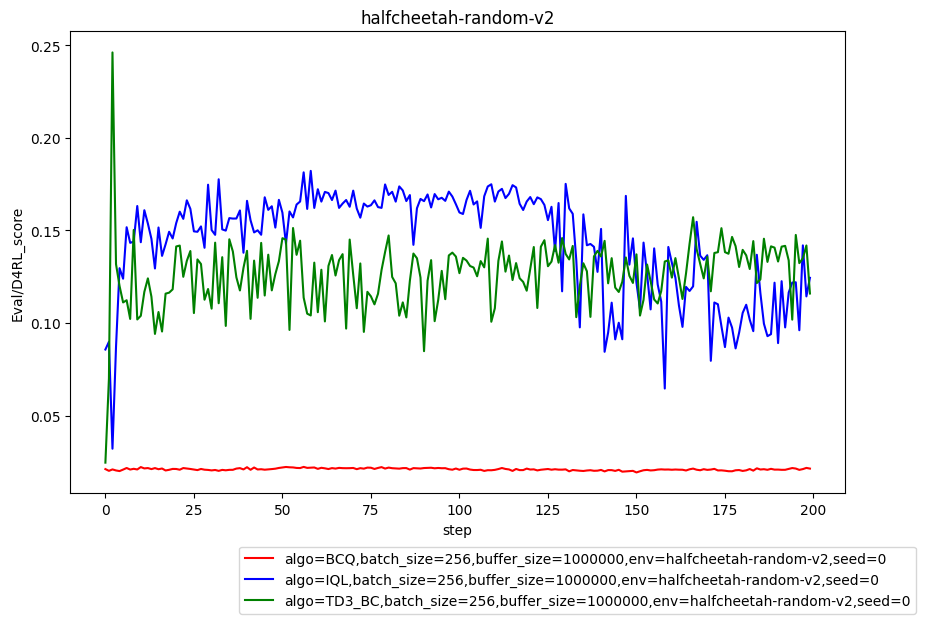

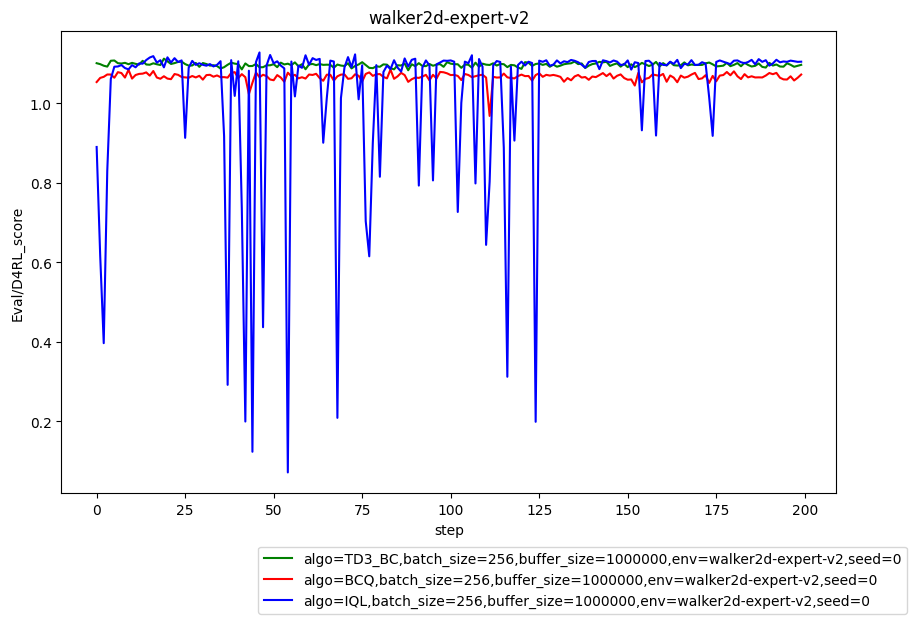

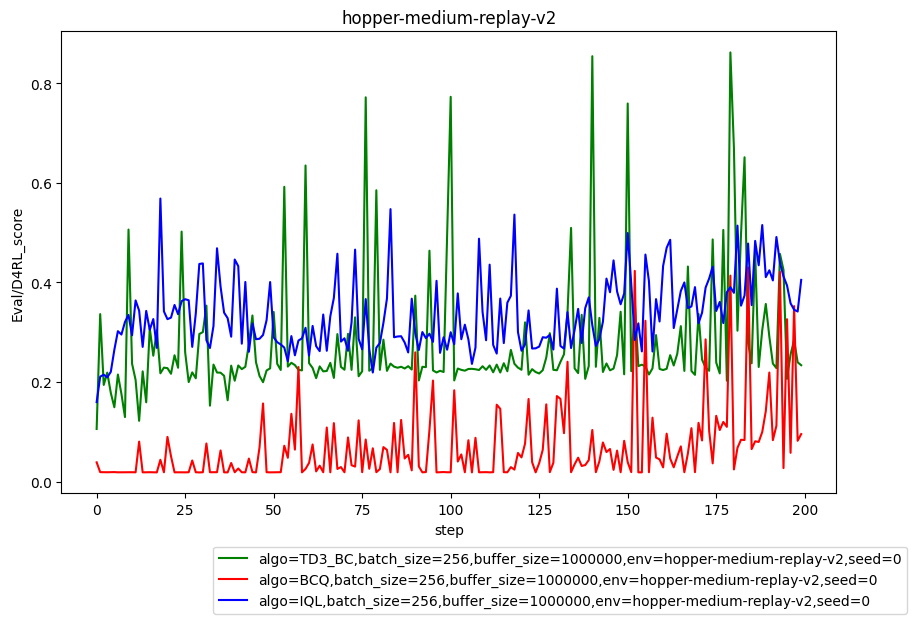

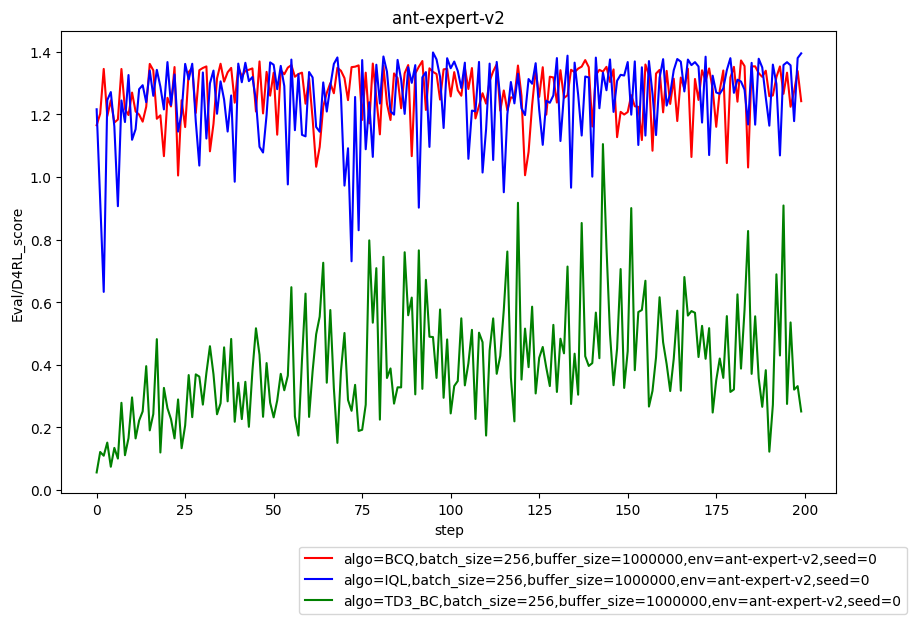

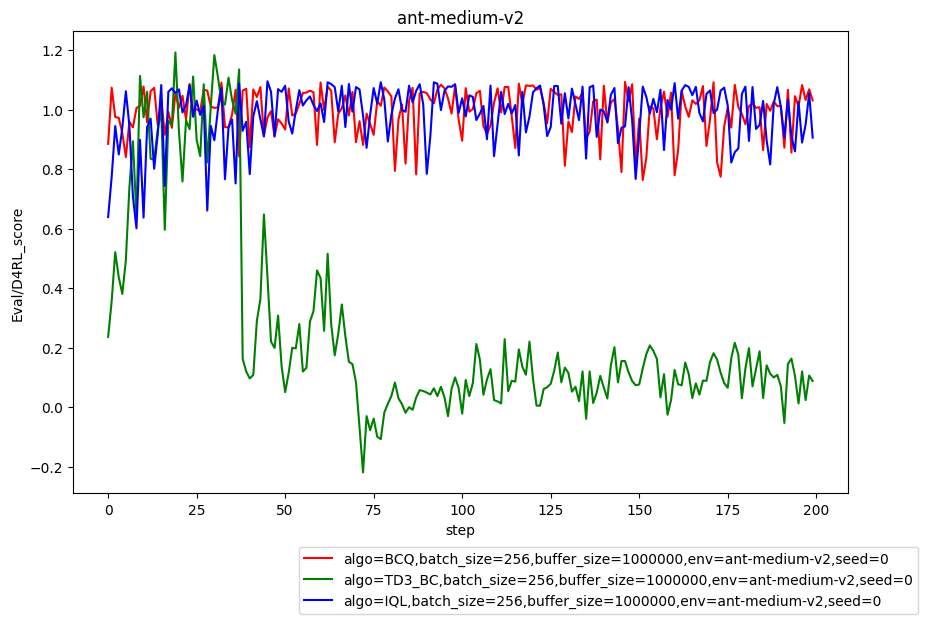

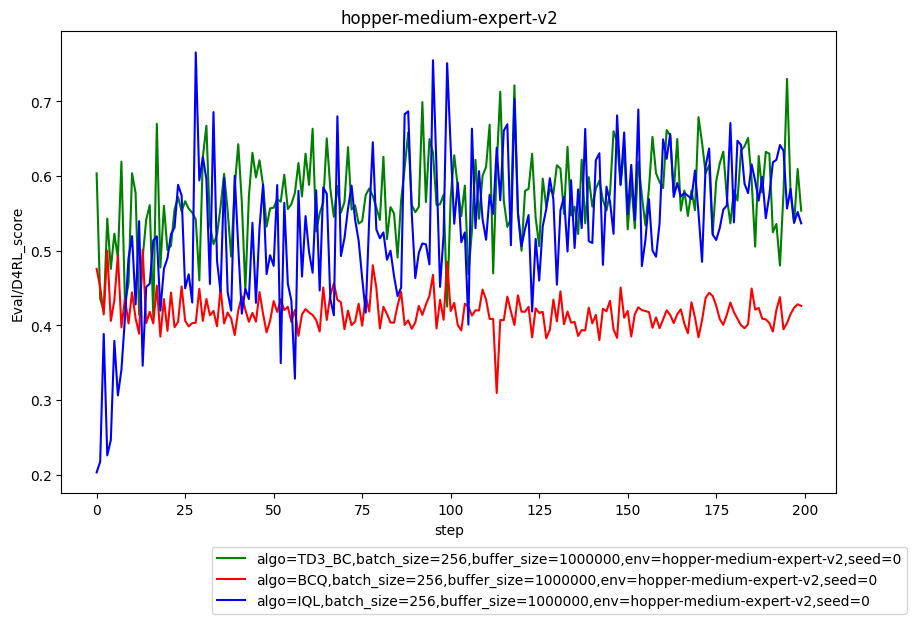

In [16]:
target_list=["Eval/D4RL_score"]
log_dir='data_backup'

bcq_color='r'
td3bc_color='g'
iql_color='b'

list_dir=os.listdir(log_dir)
dict_data={}
for data_path in list_dir:
    algo_name=data_path.split(',')[0].split('=')[1]
    env_name=data_path.split(',')[3].split('=')[1]
    if env_name not in dict_data:
        dict_data[env_name]=[data_path]
    else:
        dict_data[env_name].append(data_path)

for target in target_list:
    for key in dict_data:
        plt.figure(figsize=(10,6))
        for data_file in dict_data[key]:
            file_path=log_dir+'/'+data_file+'/'+"progress.csv"

            with open(file_path) as file:
                data=pd.read_csv(file_path,sep=',',header=0)
                
                algo_name=data_file.split(',')[0].split('=')[1]
                env_name=data_file.split(',')[3].split('=')[1]
                if algo_name=="BCQ":
                    plt.plot(data[target].values,label=data_file,color=bcq_color)
                elif algo_name=="IQL":
                    plt.plot(data[target].values,label=data_file,color=iql_color)
                elif algo_name=="TD3_BC":
                    plt.plot(data[target].values,label=data_file,color=td3bc_color)

        plt.xlabel('step')
        plt.ylabel(target)
        plt.title(env_name)
        plt.legend(bbox_to_anchor=(1.1, -.1),ncol=1)    
        plt.show()


